# Distributional and frequency effects in word embeddings: summary tests
## © 2018 Chris Culy, August 2018
### [chrisculy.net](http://chrisculy.net/)


## Overview

This is one of a [series of posts](dist_freq_more_intro.html) on extending the preceding [posts on frequency effects](dist_freq_intro.html) to more embedding techniques and more corpora. In the previous [series of posts](dist_freq_intro.html) we saw a wide range of distributional and frequency effects with respect to word embeddings. In this post, I've created some summary tests to make it easier to compare different embeddings. I'll demonstrate these tests by comparing the two different types of embeddings that fall under the rubric of [word2vec](#ref1), namely skip gram with negative sampling (sgns), which I have been using all along, with the continuous bag of words (cbow).

### Results and contribution

* **new** Summary tests for distributional and frequency effects
* **new** sgns and cbow show different frequency effects with _Vanity Fair_
    + sgns has strong frequency effects
    + cbow has moderate to weak effects
* **new** sgns and cbow show similar frequency effects with _Heart of Darkness_
* the direction of the correlations are different between _Vanity Fair_ and _Heart of Darkness_, cf. [prior post](dist_freq_stratification.html)
   

[Download as Jupyter notebook](dist_freq_properties.ipynb)

[Download supplemental Python code](dfewe.zip)

[Download summary test Python code](dfewe_nb.zip)

<input type="checkbox" id="toggleCheck" checked> Show Code

In [1]:
%load_ext autoreload
%autoreload 2

from dfewe import *
from dfewe_nb.freq_tests import run_tests as testfs
from dfewe_nb.nb_utils import *

In [2]:
#set up standard corpora + vectors
vfair_all = Setup.make_standard_sampler_and_vecs('vfair',5,100,1) #window=5, dims=100, min_count=1
heartd_all = Setup.make_standard_sampler_and_vecs('heartd',5,100,1) #window=5, dims=100, min_count=1

what = [['Vanity Fair (vfair)'],['Heart of Darkness (heartd)']]
for i,c in enumerate([vfair_all,heartd_all]):
    sampler = c['sampler']
    what[i].extend([sum(sampler.counts.values()), len(sampler.counts)])

show_table(what, headers=['Corpus','Tokens','Types'], title="Corpora sizes")

## The properties to look for

There are many different aspects of distributional and frequency effects that we have seen. Here's a list of the major ones:

* Vectors
    + vectors encode frequency (except for low frequency words)
    + nearest neighbor power-law (sometimes)

* Dimensions 
    + inner products w.r.t. the mean are skewed by frequency
    + dimensions don't encode frequency

* Shifted similaritiess:
    + the mean of all the similarities is positive
    
* Stratification
    + frequency: frequency may be directly or inversely related to similarity
    + rank: frequency of the reference term is directly related to rank
    + rank: frequency of the comparison term may be directly or inversely related to rank
    + reciprocity:  words with similar relative frequencies are more reciprocal than words with different relative frequencies
   
* Hubs
    + Hubs typically exist
    + Hubs are more common among some (typically) low frequencies

## The tests

While the preceding posts have used a lot of visualizations during the exploration of the properties, some of the properties can be summarised in a table, as we see here for _Vanity Fair_ using sgns.

In [3]:
smplr = vfair_all['sampler']
vname = 'sgns'
vs = vfair_all[vname]
name = 'vfair with %s' % vname
tests = ['vfreq','sksim','stfreq','strank','strecip']
testfs(name,smplr,vs,tests=tests)

Testing Vectors ∝ freqs
Testing Vectors ∝ non-v. low freqs
Testing Vectors ∝ non-low freqs
Testing Skewed sims
Testing Stratification of freq
Testing Stratification of rank
Testing Stratification of recip


We can quickly see that sgns used with _Vanity Fair_ shows strong frequency effects almost across the board. The one except is stratification of rank, which has a weak effect for the reference term.

Other properties really benefit from visualizations, as we see here for the test for the power law of frequency ranks, the dot product of the similarities with the mean, and the potential for skewness of the dimension values. Again, it's easy to see the results: a rough power law for nearest neighbors, a frequency effect for the dot products with the mean, and lack of skewness in the dimension values.

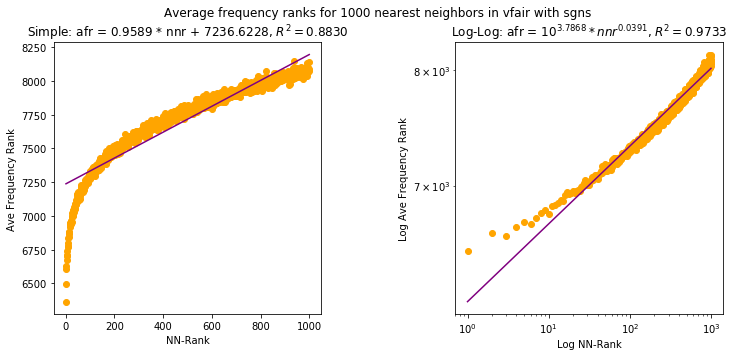

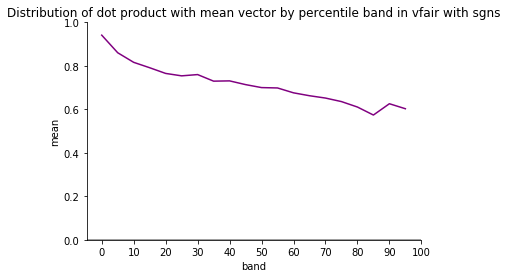

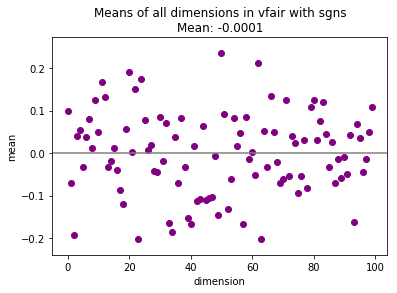

In [4]:
smplr = vfair_all['sampler']
vname = 'sgns'
vs = vfair_all[vname]
name = 'vfair with %s' % vname
tests = ['vpower','dpmean','dims']
testfs(name,smplr,vs,tests=tests)

Finally, hubs need a combination of table and visualization: the particular hubs in a table and their distribution in a chart.

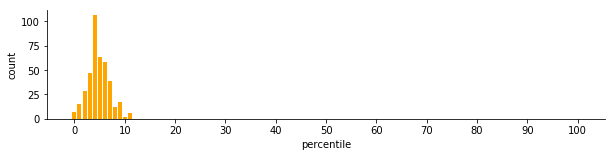

121/400 = 0.302 of the hubs were in the same band as comparison



In [5]:
smplr = vfair_all['sampler']
vname = 'sgns'
vs = vfair_all[vname]
name = 'vfair with %s' % vname
tests = ['hubs','hubp']
testfs(name,smplr,vs,tests=tests)

## Comparions of sgns and cbow

By having this suite of tests, it is also easy to compare different embeddings, whether using different corpora or different methods. In this section, we'll use the tests to compare the other word2vec method, cbow, with sgns shown above.

First, the table.

In [6]:
vfair_all['cbow'] = Setup.make_vecs('cbow', vfair_all['sampler'].sents, 1,5,100,init_sims=True) #window=5, dims=100, min_count=1
heartd_all['cbow'] = Setup.make_vecs('cbow', heartd_all['sampler'].sents, 1,5,100,init_sims=True) #window=5, dims=100, min_count=1

In [7]:
smplr = vfair_all['sampler']
vname = 'cbow'
vs = vfair_all[vname]
name = 'vfair with %s' % vname
tests = ['vfreq','sksim','stfreq','strank','strecip']
testfs(name,smplr,vs,tests=tests)

Testing Vectors ∝ freqs
Testing Vectors ∝ non-v. low freqs
Testing Vectors ∝ non-low freqs
Testing Skewed sims
Testing Stratification of freq
Testing Stratification of rank
Testing Stratification of recip


What see from the table is that cbow has very different properties from sgns. In particular, it shows only weak to moderate frequency effects, unlike sgns which showed mostly strong frequency effects.

Next the charts. The results for cbow here are also different from those for sgns. The power law is much less clear, and theres is not a consistent pattern of the dot product with the mean, unlike there is with sgns. The only thing in common is the _lack_ of frequency effect for the dimension values.

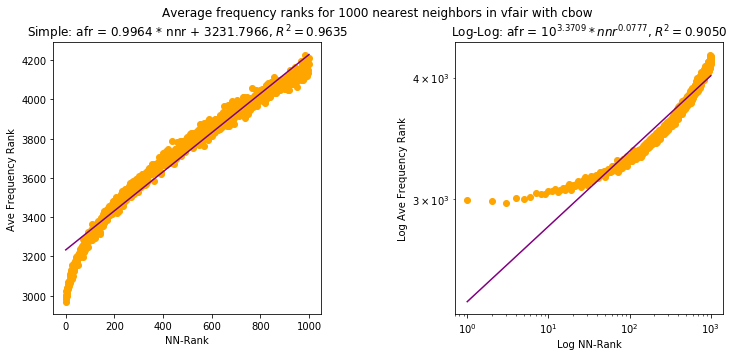

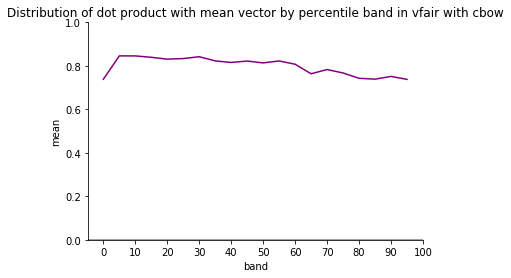

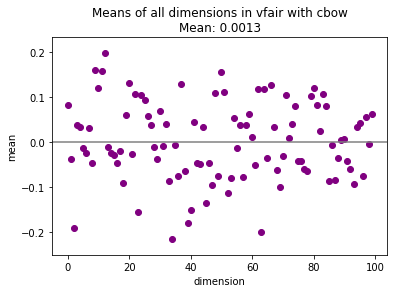

In [8]:
smplr = vfair_all['sampler']
vname = 'cbow'
vs = vfair_all[vname]
name = 'vfair with %s' % vname
tests = ['vpower','dpmean','dims']
testfs(name,smplr,vs,tests=tests)

Finally, the hubs. The main thing to notice is that the hubs with cbow are a bit more distributed across the percentiles, though they are still concentrated in the 0-10 percentile band.

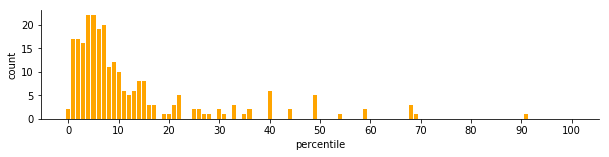

57/253 = 0.225 of the hubs were in the same band as comparison



In [9]:
smplr = vfair_all['sampler']
vname = 'cbow'
vs = vfair_all[vname]
name = 'vfair with %s' % vname
tests = ['hubs','hubp']
testfs(name,smplr,vs,tests=tests)

Given that cbow is so different from sgns with vfair, let's see how they compare on _Heart of Darkness_.

First the tables. For heartd, the two word2vec approaches are similar, both showing only moderate to weak effects, unlike sgns for vfair. Note too that the direction of the correlations are different between vfair and heartd.

<table>
    <tr><th></th><th>vfair</th><th>heartd</th></tr>
    <tr><th>Frequency</th><td>inverse</td><td>direct</td></tr>
    <tr><th>Rank reference</th><td>direct</td><td>direct</td></tr>
    <tr><th>Rank comparitor</th><td>inverse</td><td>direct</td></tr>
    <tr><th>Reciprocity</th><td>inverse</td><td>inverse</td></tr>
</table>

In [10]:
smplr = heartd_all['sampler']

tests = ['vfreq','sksim','stfreq','strank','strecip']

vname = 'sgns'
name = 'heartd with %s' % vname
vs = heartd_all[vname]
testfs(name,smplr,vs,tests=tests)

vname = 'cbow'
name = 'heartd with %s' % vname
vs = heartd_all[vname]
testfs(name,smplr,vs,tests=tests)

Testing Vectors ∝ freqs
Testing Vectors ∝ non-v. low freqs
Testing Vectors ∝ non-low freqs
Testing Skewed sims
Testing Stratification of freq
Testing Stratification of rank
Testing Stratification of recip





Testing Vectors ∝ freqs
Testing Vectors ∝ non-v. low freqs
Testing Vectors ∝ non-low freqs
Testing Skewed sims
Testing Stratification of freq
Testing Stratification of rank
Testing Stratification of recip


Next up: the charts. Once again, the two approachs are _somewhat_ similar. While they both lack a clear power-law relation, with sgns the data seems linear where it does not with cbow.

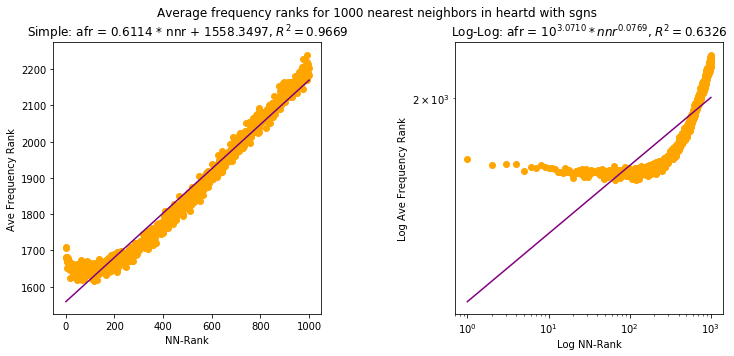

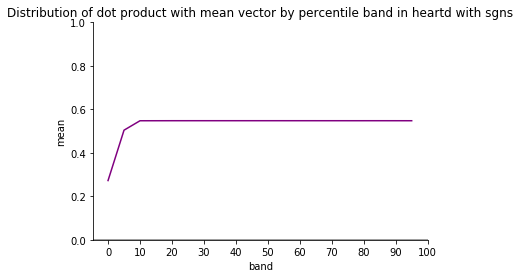

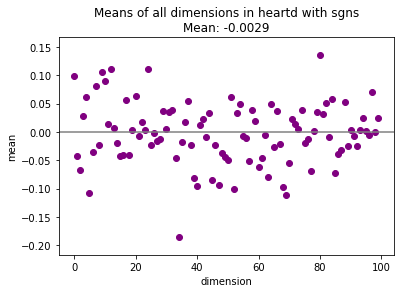

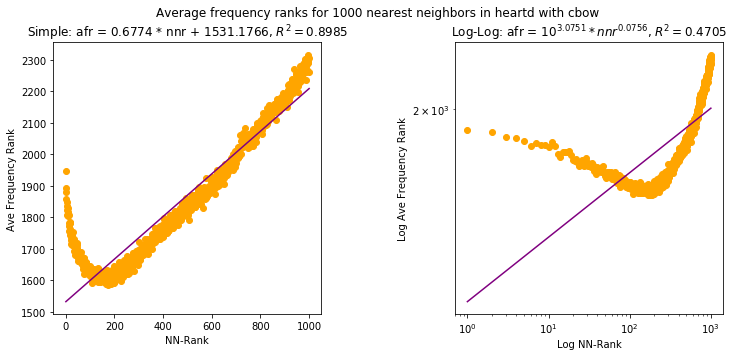

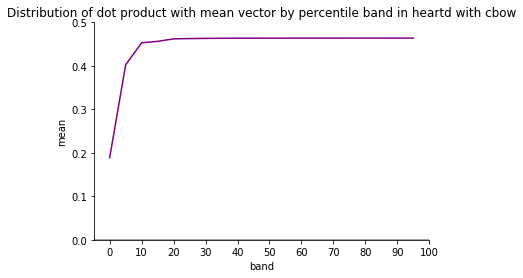

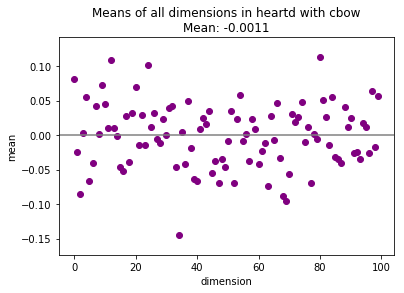

In [11]:
smplr = heartd_all['sampler']

tests = ['vpower','dpmean','dims']

vname = 'sgns'
name = 'heartd with %s' % vname
vs = heartd_all[vname]
testfs(name,smplr,vs,tests=tests)

vname = 'cbow'
name = 'heartd with %s' % vname
vs = heartd_all[vname]
testfs(name,smplr,vs,tests=tests)

And finally, the hubs, where the approaches are again similar.

In [12]:
smplr = heartd_all['sampler']

tests = ['hubs','hubp']

vname = 'sgns'
name = 'heartd with %s' % vname
vs = heartd_all[vname]
testfs(name,smplr,vs,tests=tests)

vname = 'cbow'
name = 'heartd with %s' % vname
vs = heartd_all[vname]
testfs(name,smplr,vs,tests=tests)

Didn't find hubs for percentile bands at the threshold of 2 standard deviations



Didn't find hubs for percentile bands at the threshold of 2 standard deviations



What we have seen is that sgns and cbow differ dramatically on the larger corpus vfair but are very similar on the smaller corpus heartd. There are also differences between vfair and cbow, for example in the trends for the dot product. The summary tests make these differences easy to see.

In the [first set of posts](dist_freq_intro.html) we consistently saw differences between vfair and heartd, and we see differences again here with cbow. This raises the question of how much corpus size affects the frequency effects. In the [next post](dist_freq_large_corpora.html), we'll look at some large corpora.

[Back to the introduction](dist_freq_more.html)


## The posts

* Summary tests
* [Large corpora](dist_freq_large_corpora.html)

## Reference

<span id="ref1">[1]</span> Tomas Mikolov, Ilya Sutskever, Kai Chen, Gregory S. Corrado, and Jeffrey Dean. 2013. Distributed representations of words and phrases and their composi- tionality. In Advances in Neural Information Processing Systems 26: 27th Annual Conference on Neural Information Processing Systems 2013. Proceedings of a meeting held December 5-8, 2013, Lake Tahoe, Nevada, United States. 3111–3119.
